In [1]:
import cv2
from erctag import ALVAR_TAGS, TagDetector, visualize_tags

In [2]:
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('../data/examples/img_000539_1691417504471.jpg', )


In [4]:
import numpy as np

In [5]:
calibration, distortion = np.load('../data/calibration/calibration.pkl', allow_pickle=True)


In [6]:
detector = TagDetector(
    calibration=calibration,
    distortion=distortion,
    tag_size=200,
)

In [7]:
detection = detector.detect_tags(img)

In [8]:
detection

[Detection(tag_id=0, corners=[(1286, 462), (1277, 521), (1345, 534), (1357, 473)], value=array([0.84279275, 0.8729887 , 0.18881464, 0.81127745, 0.8656527 ,
        0.87095827, 0.877749  , 0.1881108 , 0.8177334 , 0.8805046 ,
        0.87973803, 0.2264334 , 0.8239017 , 0.2501062 , 0.8125025 ,
        0.8707611 , 0.8473066 , 0.8910314 , 0.85589767, 0.8921825 ,
        0.8656428 , 0.8879962 , 0.8969271 , 0.89841145, 0.9036719 ],
       dtype=float32), distance=3.6878371238708496, rotation=0, t=array([[-2640.56836483],
        [ -323.14164612],
        [ 2584.26207282]]), R=array([[ 0.47625156, -0.73358962,  0.48479967],
        [-0.79675216, -0.12678372,  0.59085691],
        [-0.37198179, -0.66766171, -0.64487006]])),
 Detection(tag_id=1, corners=[(107, 294), (115, 322), (142, 315), (134, 289)], value=array([0.8276444 , 0.63549256, 0.27344367, 0.778044  , 0.8679343 ,
        0.86951435, 0.62662256, 0.36263824, 0.7353807 , 0.8864711 ,
        0.59191567, 0.4286619 , 0.65732765, 0.4557615 ,

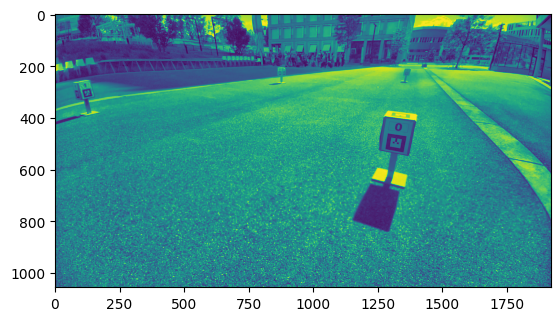

In [20]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe_img = clahe.apply(gray)

plt.imshow(clahe_img)

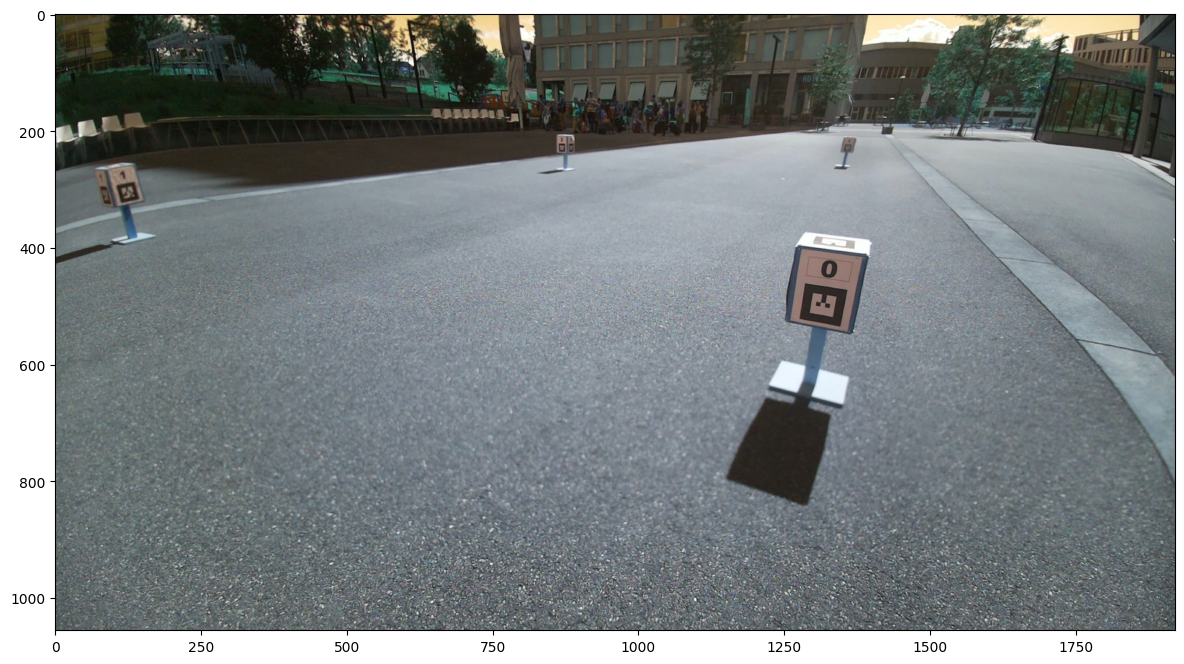

<Figure size 1600x800 with 0 Axes>

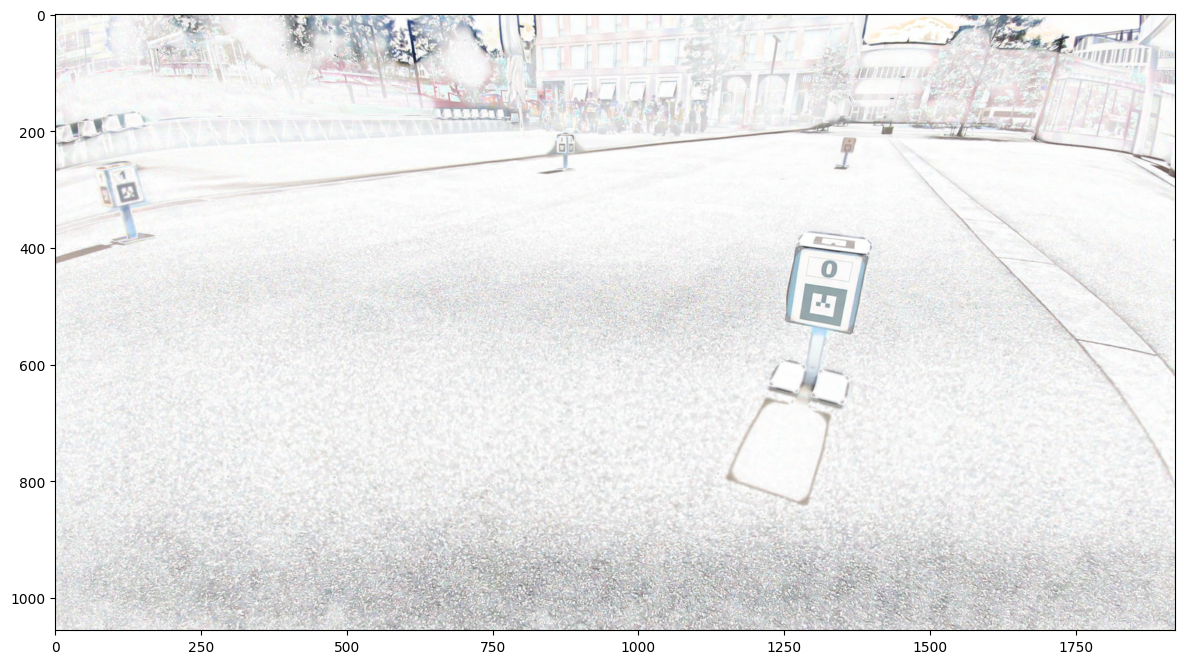

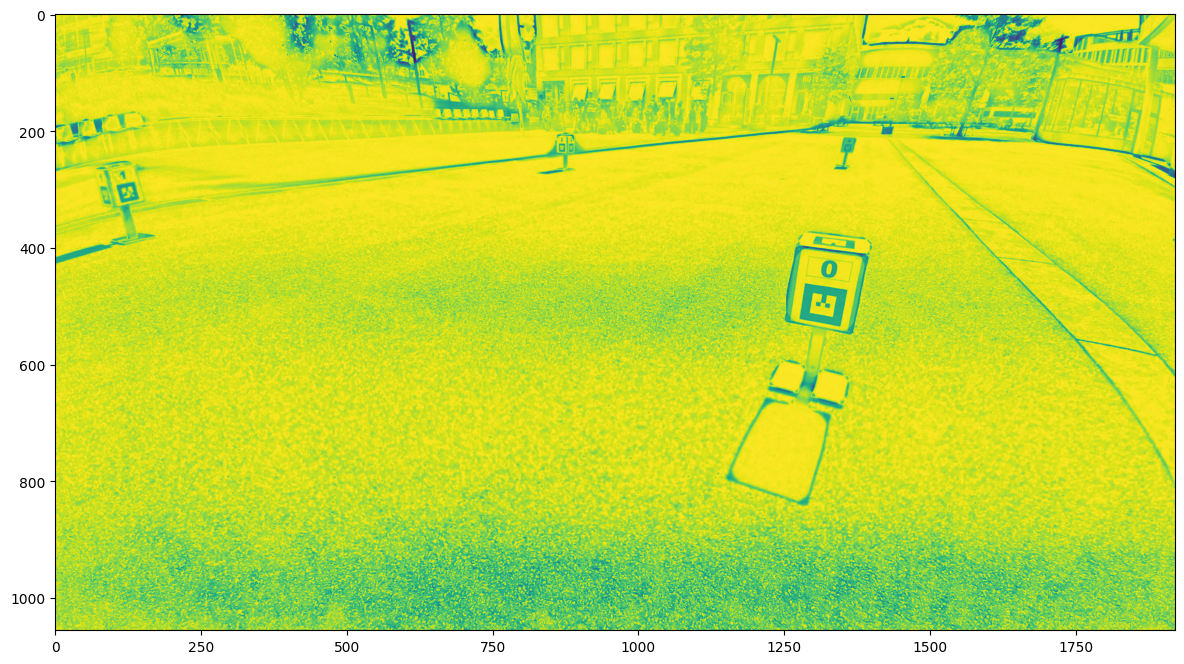

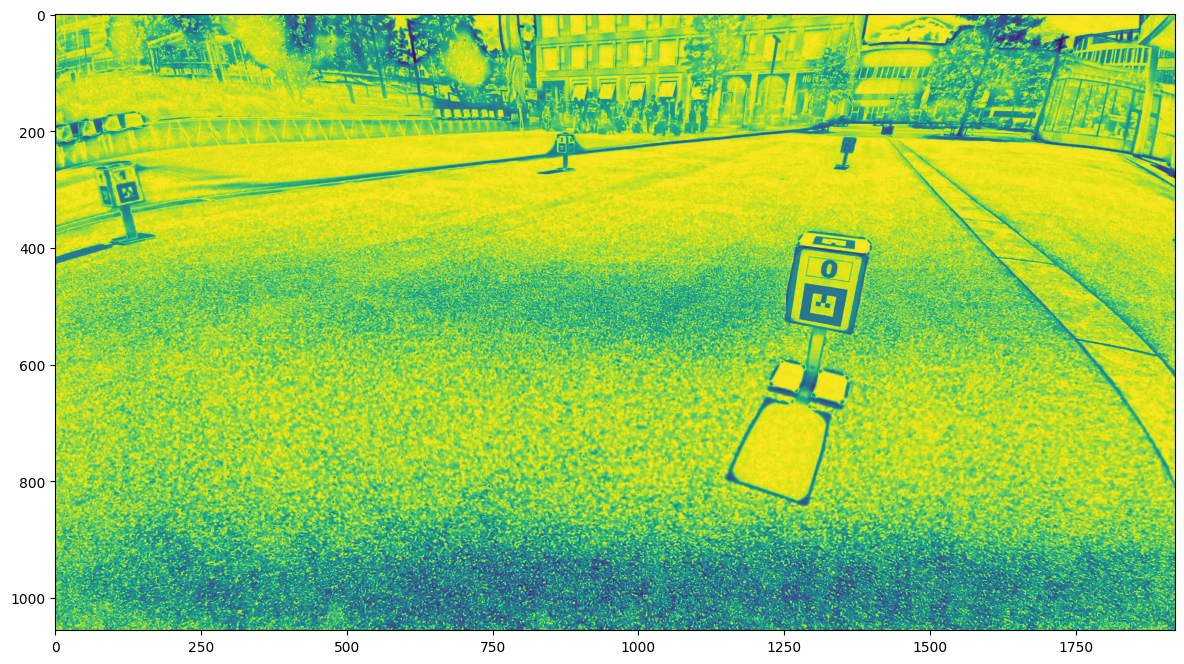

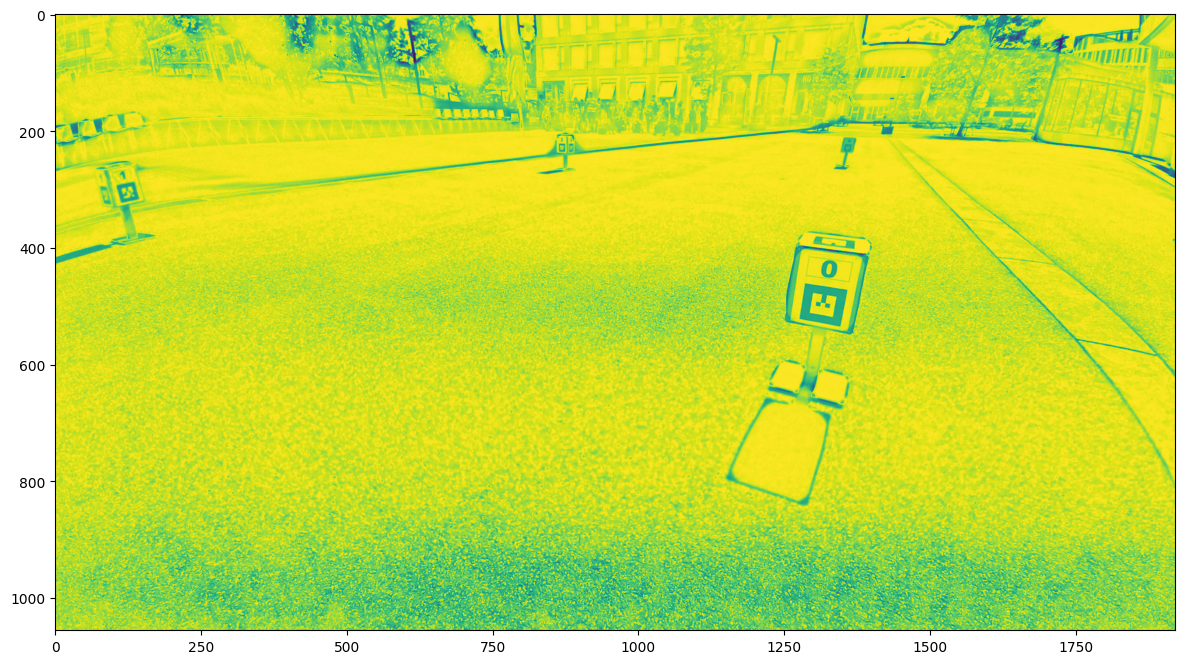

In [52]:

import numpy as np
plt.figure(figsize=(16, 8))


rgb_planes = cv2.split(img)
result_planes = []
plt.imshow(img)
plt.show()
plt.figure(figsize=(16, 8))

for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 33)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    result_planes.append(diff_img)
plt.figure(figsize=(16, 8))
plt.imshow(cv2.merge(result_planes))
plt.show()
gray = cv2.cvtColor(cv2.merge(result_planes), cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 8))

plt.imshow(gray)
plt.show()
plt.figure(figsize=(16, 8))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
result = clahe.apply(gray)

plt.imshow(result)
plt.show()
plt.figure(figsize=(16, 8))

min_val, max_val, _, _ = cv2.minMaxLoc(gray)
contrast_stretched = (gray - min_val) * (255.0 / (max_val - min_val))

plt.imshow(contrast_stretched)
plt.show()

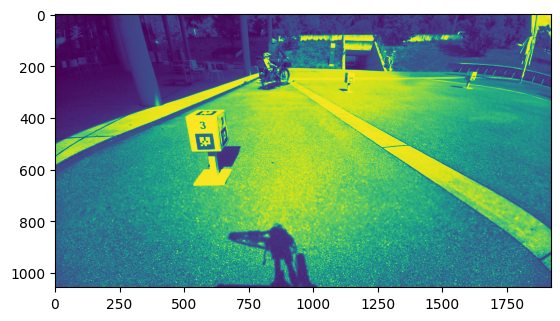

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(gray)
plt.imshow(equalized_img)

In [50]:
np.load('../data/calibration/calibration.pkl', allow_pickle=True)

(array([[1.46757449e+03, 0.00000000e+00, 6.70924232e+02],
        [0.00000000e+00, 1.76992957e+03, 3.76939073e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[ 1.3628861 , -5.59947733, -0.01674108, -0.22750355, 10.2141071 ]]))

In [12]:
calibration

array([[1.46757449e+03, 0.00000000e+00, 6.70924232e+02],
       [0.00000000e+00, 1.76992957e+03, 3.76939073e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [13]:
distortion

array([[ 1.3628861 , -5.59947733, -0.01674108, -0.22750355, 10.2141071 ]])